# Optimización de Portafolios con Algoritmo Genético y Algoritmo Genético Multiobjetivo

#### Santiago Mora Cruz 
#### Gabriel Reynoso Escamilla

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Datos

### Escoger stocks deseados

In [2]:
# Lista de tickers para extraer información y construir portafolio

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-B', 'JNJ',
       'V', 'UNH', 'JPM', 'PG', 'HD', 'MA', 'BAC', 'XOM', 'PFE', 'KO', 'MRK',
       'PEP', 'ABBV', 'CSCO', 'AVGO', 'TMO', 'LLY', 'NFLX', 'COST', 'ORCL',
       'NKE', 'DIS', 'ABT', 'CRM', 'ACN', 'TXN', 'VZ', 'ADBE', 'MCD', 'HON',
       'WMT', 'INTC', 'QCOM', 'UPS', 'MS', 'LIN', 'CVX', 'T', 'UNP', 'LOW',
       'SBUX', 'NEE', 'PM', 'AMGN', 'DHR', 'BA', 'BMY', 'SPGI', 'CAT', 'GS',
       'RTX', 'BLK', 'SCHW', 'AMT', 'IBM', 'MDLZ', 'ISRG', 'NOW', 'PLD',
       'INTU', 'DE', 'BKNG', 'MO', 'MDT', 'CI', 'CB', 'LMT', 'MMC', 'TGT',
       'GE', 'PYPL', 'ELV', 'ZTS', 'ADI', 'SYK', 'DUK', 'EW', 'SO', 'CL',
       'VRTX', 'FIS', 'ICE', 'APD', 'ETN', 'SHW', 'CCI', 'GM']

# Marco de tiempo de información: de hace 5 años a hoy
end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

### Extraer info de Yahoo! Finance

In [3]:
# Irle agregando la información a un DataFrame de Pandas
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Dataframe

In [4]:
adj_close_df

,AAPL,MSFT,GOOGL,AMZN,TSLA,META,NVDA,BRK-B,JNJ,V,...,SO,CL,VRTX,FIS,ICE,APD,ETN,SHW,CCI,GM
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-21,58.182003,132.221375,62.060326,89.282997,16.900000,189.190369,4.876531,211.490005,111.560303,170.345596,...,50.398834,60.657471,183.529999,116.952927,87.403381,189.714691,75.574577,175.484070,116.759918,34.313114
2019-10-22,58.048965,130.253754,61.906712,88.286499,17.038668,181.792633,4.866579,210.619995,112.588585,164.967667,...,50.276081,59.933533,191.059998,113.875450,86.036079,183.912170,76.678757,180.738342,115.090164,34.676014
2019-10-23,58.827911,131.084793,62.726181,88.108498,16.978666,185.591202,4.853642,210.960007,113.198578,165.411835,...,50.693417,60.362526,190.509995,115.264389,87.028748,186.657928,76.624458,179.775497,114.764374,34.962505
2019-10-24,58.924679,133.663635,62.799999,89.039001,19.978666,185.820526,4.897678,210.259995,111.107147,170.084869,...,50.693417,61.077503,194.470001,117.297890,87.010033,187.910828,76.253380,183.021088,115.424149,34.208054
2019-10-25,59.650410,134.418228,63.058857,88.066498,21.875334,187.325989,5.088748,211.800003,111.847862,171.716599,...,50.202438,61.140076,194.490005,117.397743,86.120354,189.501404,77.493362,183.301682,114.845802,35.086655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-10,229.039993,415.839996,162.080002,186.649994,238.770004,583.830017,134.809998,454.929993,160.509995,277.470001,...,88.260002,99.239998,476.149994,86.489998,160.649994,314.609985,336.940002,376.450012,109.940002,47.689999
2024-10-11,227.550003,416.320007,163.240005,188.820007,217.800003,589.950012,134.800003,460.209991,161.460007,277.839996,...,88.959999,100.099998,481.709991,86.750000,162.570007,316.660004,341.390015,378.989990,110.809998,47.869999
2024-10-14,231.300003,419.140015,164.960007,187.539993,219.160004,590.419983,138.070007,459.980011,161.600006,280.679993,...,89.839996,100.730003,484.820007,87.790001,164.380005,320.339996,345.609985,384.160004,112.029999,48.630001


### Calcular *log returns* 

In [5]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1)) # ln (precio de día n - precio del día n-1)
log_returns = log_returns.dropna()

### Calcular matriz de covarianza usando *log returns*

In [6]:
cov_matrix = log_returns.cov() * 252 # 252 para valores anuales 
cov_matrix

,AAPL,MSFT,GOOGL,AMZN,TSLA,META,NVDA,BRK-B,JNJ,V,...,SO,CL,VRTX,FIS,ICE,APD,ETN,SHW,CCI,GM
AAPL,0.100552,0.072240,0.067278,0.067448,0.104833,0.080200,0.104327,0.037547,0.023456,0.052082,...,0.031689,0.023848,0.040534,0.051939,0.040477,0.040478,0.050427,0.046097,0.041697,0.052884
MSFT,0.072240,0.091853,0.073464,0.073094,0.092286,0.084318,0.111600,0.035547,0.022891,0.052150,...,0.029971,0.025857,0.041863,0.052779,0.043013,0.041909,0.051006,0.046107,0.040813,0.050214
GOOGL,0.067278,0.073464,0.102732,0.074179,0.085489,0.092703,0.103815,0.035398,0.019754,0.049166,...,0.027207,0.020980,0.037844,0.053004,0.039162,0.037725,0.047587,0.041290,0.035062,0.054783
AMZN,0.067448,0.073094,0.074179,0.126683,0.102251,0.097397,0.111668,0.027467,0.013154,0.040771,...,0.018522,0.017552,0.031763,0.044569,0.037292,0.030704,0.037253,0.039015,0.033976,0.043882
TSLA,0.104833,0.092286,0.085489,0.102251,0.434837,0.100234,0.171257,0.039551,0.011354,0.066594,...,0.019336,0.013322,0.046765,0.069874,0.051563,0.044880,0.063387,0.062085,0.050356,0.100665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APD,0.040478,0.041909,0.037725,0.030704,0.044880,0.043625,0.057145,0.035965,0.026230,0.043170,...,0.042049,0.028132,0.030762,0.044132,0.037249,0.093400,0.052186,0.044758,0.041281,0.055222
ETN,0.050427,0.051006,0.047587,0.037253,0.063387,0.055653,0.081684,0.047492,0.023912,0.054996,...,0.035053,0.023390,0.032026,0.051036,0.042230,0.052186,0.105788,0.054923,0.037554,0.080585
SHW,0.046097,0.046107,0.041290,0.039015,0.062085,0.051718,0.067595,0.033734,0.022604,0.045681,...,0.035849,0.027110,0.033148,0.047759,0.039983,0.044758,0.054923,0.090132,0.043671,0.052356
CCI,0.041697,0.040813,0.035062,0.033976,0.050356,0.039425,0.048708,0.030932,0.028243,0.037342,...,0.047110,0.030426,0.032406,0.042940,0.040218,0.041281,0.037554,0.043671,0.088116,0.041418


### Definir métricas del portafolio
* Desviación estándar: El riesgo asociado al portafolio usando la matriz de covarianza
* Retorno esperado: El valor esperado de retorno de inversión de un portafolio
* Sharpe Ratio: Una métrica utilizada en finanzas para asociar ambos valores

In [7]:
# Funciones

def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights) * 252 # 252 para anual

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate = 0.02):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

# Optimización

### Restricciones:

* $\sum_{i=n}^{n}w_i = 1$
* $w_i \geq 0, i = 1, 2, \dots, n $

* Donde:
    * $w_i$: Peso asociado al stock i

## Maximizar Sharpe Ratio

$\text{max} \frac{\sum_{i=n}^{n}w_i \mu_i - r}{\sigma}$

* Donde:
    * $w_i$: Peso asociado al stock i
    * $\mu_i$: Retorno esperado del stock i
    * $r$: risk free rate (generalmente $r=0.02$)
    * $\sigma = W \Sigma W^T$: Desviación estándar asociada al portafolio
        * $W$: Vector de pesos del portafolio
        * $\Sigma$: Matriz de covarianza

In [8]:
import numpy as np
import random

# Crear Individuo, normalizando para asegurar que la suma de los pesos sea igual a 1 
def createIndividual(nbAssets):
    weights = np.random.rand(nbAssets)
    return weights / np.sum(weights)

# Two-point crossover
def combine(parentA, parentB, cRate):
    if random.random() <= cRate:
        # Seleccionar dos crossover points
        cPoint1 = np.random.randint(1, len(parentA) - 1)
        cPoint2 = np.random.randint(cPoint1 + 1, len(parentA))

        # Crear offsprings usando two-point crossover
        offspringA = np.concatenate((parentA[:cPoint1], parentB[cPoint1:cPoint2], parentA[cPoint2:]))
        offspringB = np.concatenate((parentB[:cPoint1], parentA[cPoint1:cPoint2], parentB[cPoint2:]))
    else:
        offspringA = np.copy(parentA)
        offspringB = np.copy(parentB)
    
    # Normalizar para asegurar que la suma de los pesos sea igual a 1 
    offspringA = offspringA / np.sum(offspringA)
    offspringB = offspringB / np.sum(offspringB)
    
    return offspringA, offspringB


# Mutación asegurando que la suma de los pesos sea igual a 1 y que no haya valores negativos
 
def mutate(individual, mRate):
    for i in range(len(individual)):
        if random.random() <= mRate:
            individual[i] += np.random.uniform(-0.2, 0.2)
    # Ensure no negative weights
    individual = np.clip(individual, 0, None)
    # Ensure weights sum to 1
    individual = individual / np.sum(individual)
    return individual

# Fitness function (Sharpe Ratio)
def evaluate(individual, log_returns, cov_matrix, risk_free_rate=0.02):
    return sharpe_ratio(individual, log_returns, cov_matrix, risk_free_rate)

# Selección (torneo)
def select(population, evaluation, tournamentSize):
    winner = np.random.randint(0, len(population))
    for _ in range(tournamentSize - 1):
        rival = np.random.randint(0, len(population))
        if evaluation[rival] > evaluation[winner]:
            winner = rival
    return population[winner]

# Algoritmo Genético para maximizar Sharpe Ratio
def geneticAlgorithm(nbAssets, populationSize, cRate, mRate, generations, log_returns, cov_matrix, risk_free_rate):
    population = [createIndividual(nbAssets) for _ in range(populationSize)]
    evaluation = [evaluate(ind, log_returns, cov_matrix, risk_free_rate) for ind in population]
    
    bestIndividual = max(zip(population, evaluation), key=lambda x: x[1])[0]
    bestEvaluation = max(evaluation)

    for gen in range(generations):
        newPopulation = []
        for _ in range(populationSize // 2):
            parentA = select(population, evaluation, 3)
            parentB = select(population, evaluation, 3)
            offspringA, offspringB = combine(parentA, parentB, cRate)
            newPopulation.extend([offspringA, offspringB])
        
        population = [mutate(ind, mRate) for ind in newPopulation]
        evaluation = [evaluate(ind, log_returns, cov_matrix, risk_free_rate) for ind in population]

        bestInGen = max(zip(population, evaluation), key=lambda x: x[1])[0]
        bestEvalInGen = max(evaluation)
        if bestEvalInGen > bestEvaluation:
            bestIndividual = bestInGen
            bestEvaluation = bestEvalInGen

    return bestIndividual, bestEvaluation

solution, evaluation = geneticAlgorithm(96, 30, 0.80, 0.05, 200, log_returns, cov_matrix, 0.02)
print(evaluation)


1.4104993735914884


In [9]:
# Calcular métricas del portafolio
optimal_portfolio_return = expected_return(solution, log_returns)
optimal_portfolio_volatility = standard_deviation(solution, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(solution, log_returns, cov_matrix)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Expected Annual Return: 0.3205
Expected Volatility: 0.2131
Sharpe Ratio: 1.4105


### Análisis de Resultados

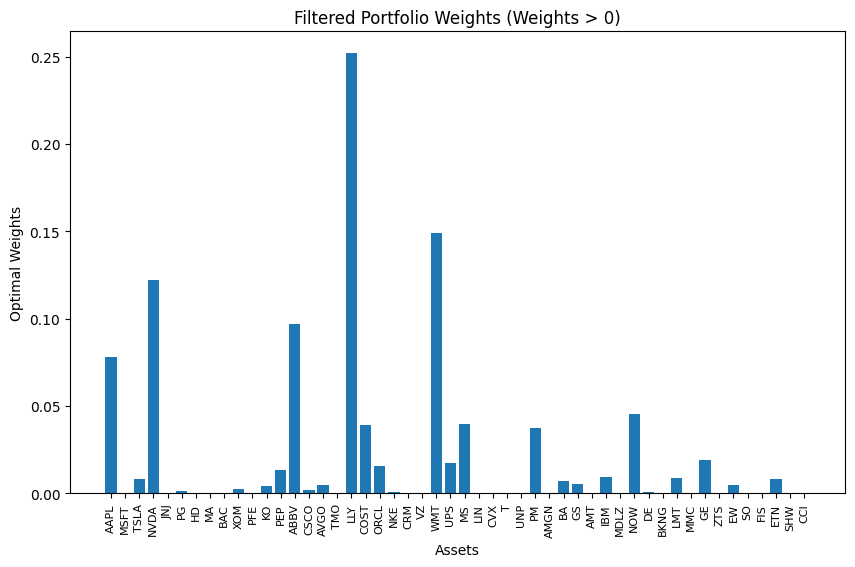

In [10]:
# Graficar solo los stocks cuyos pesos son mayores que 0
import matplotlib.pyplot as plt

filtered_tickers = [tickers[i] for i in range(len(solution)) if solution[i] > 0]
filtered_weights = [solution[i] for i in range(len(solution)) if solution[i] > 0]

plt.figure(figsize=(10, 6))
plt.bar(filtered_tickers, filtered_weights)

plt.xlabel('Assets')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Optimal Weights')
plt.title('Filtered Portfolio Weights (Weights > 0)')

plt.show()


## Solo maximizar profit

$\text{max} \sum_{i=n}^{n}w_i \mu_i$

* Donde:
    * $w_i$: Peso asociado al stock i
    * $\mu_i$: Retorno esperado del stock i

In [11]:
# Fitness function (Maximizar Retorno del Portafolio)
def evaluate_max_return(individual, log_returns):
    return expected_return(individual, log_returns)

# GAlgoritmo Genético para maximizar retorno esperado
def geneticAlgorithm_maxReturn(nbAssets, populationSize, cRate, mRate, generations, log_returns):
    population = [createIndividual(nbAssets) for _ in range(populationSize)]
    evaluation = [evaluate_max_return(ind, log_returns) for ind in population]
    
    bestIndividual = max(zip(population, evaluation), key=lambda x: x[1])[0]
    bestEvaluation = max(evaluation)

    for gen in range(generations):
        newPopulation = []
        for _ in range(populationSize // 2):
            parentA = select(population, evaluation, 3)
            parentB = select(population, evaluation, 3)
            offspringA, offspringB = combine(parentA, parentB, cRate)
            newPopulation.extend([offspringA, offspringB])
        
        population = [mutate(ind, mRate) for ind in newPopulation]
        evaluation = [evaluate_max_return(ind, log_returns) for ind in population]

        bestInGen = max(zip(population, evaluation), key=lambda x: x[1])[0]
        bestEvalInGen = max(evaluation)
        if bestEvalInGen > bestEvaluation:
            bestIndividual = bestInGen
            bestEvaluation = bestEvalInGen

    return bestIndividual, bestEvaluation

solution, evaluation = geneticAlgorithm_maxReturn(96, 30, 0.80, 0.05, 200, log_returns)
print(evaluation)


0.4216094880371867


### Análisis de Resultados

In [12]:
# Métricas del portafolio
optimal_portfolio_return = expected_return(solution, log_returns)
optimal_portfolio_volatility = standard_deviation(solution, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(solution, log_returns, cov_matrix)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Expected Annual Return: 0.4216
Expected Volatility: 0.3414
Sharpe Ratio: 1.1762


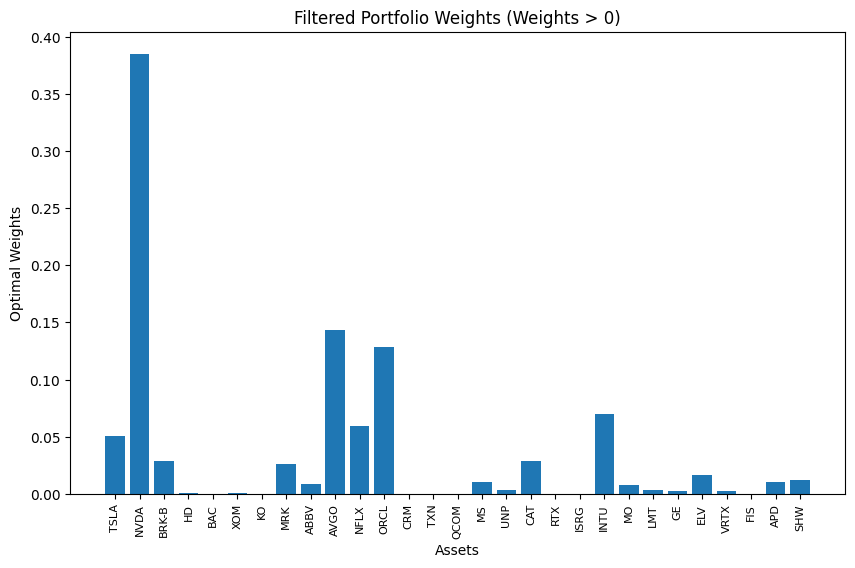

In [13]:
# Graficar solo los stocks cuyos pesos son mayores que 0
filtered_tickers = [tickers[i] for i in range(len(solution)) if solution[i] > 0]
filtered_weights = [solution[i] for i in range(len(solution)) if solution[i] > 0]

plt.figure(figsize=(10, 6))
plt.bar(filtered_tickers, filtered_weights)

plt.xlabel('Assets')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Optimal Weights')
plt.title('Filtered Portfolio Weights (Weights > 0)')

plt.show()


## Solo minimizar covarianza

$\text{min } {\sigma = W \Sigma W^T}$

* Donde:
    * $\sigma$: Desviación estándar asociada al portafolio
    * $W$: Vector de pesos del portafolio
    * $\Sigma$: Matriz de covarianza

In [14]:
# Fitness function (Minimizar Desviación Estándar del Portafolio)
def evaluate_min_risk(individual, cov_matrix):
    return -standard_deviation(individual, cov_matrix)  # Negativo para minimizarlo

# Algoritmo Genético para minimizar el riesgo (desviación estándar del portafolio)
def geneticAlgorithm_minRisk(nbAssets, populationSize, cRate, mRate, generations, cov_matrix):
    population = [createIndividual(nbAssets) for _ in range(populationSize)]
    evaluation = [evaluate_min_risk(ind, cov_matrix) for ind in population]
    
    bestIndividual = max(zip(population, evaluation), key=lambda x: x[1])[0]
    bestEvaluation = max(evaluation)

    for gen in range(generations):
        newPopulation = []
        for _ in range(populationSize // 2):
            parentA = select(population, evaluation, 3)
            parentB = select(population, evaluation, 3)
            offspringA, offspringB = combine(parentA, parentB, cRate)
            newPopulation.extend([offspringA, offspringB])
        
        population = [mutate(ind, mRate) for ind in newPopulation]
        evaluation = [evaluate_min_risk(ind, cov_matrix) for ind in population]

        bestInGen = max(zip(population, evaluation), key=lambda x: x[1])[0]
        bestEvalInGen = max(evaluation)
        if bestEvalInGen > bestEvaluation:
            bestIndividual = bestInGen
            bestEvaluation = bestEvalInGen

    return bestIndividual, bestEvaluation

solution, evaluation = geneticAlgorithm_minRisk(96, 30, 0.80, 0.05, 200, cov_matrix)
print(evaluation)


-0.1576955457933044


### Análisis de Resultados

In [15]:
# Métricas del portafolio
optimal_portfolio_return = expected_return(solution, log_returns)
optimal_portfolio_volatility = standard_deviation(solution, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(solution, log_returns, cov_matrix)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Expected Annual Return: 0.0993
Expected Volatility: 0.1577
Sharpe Ratio: 0.5031


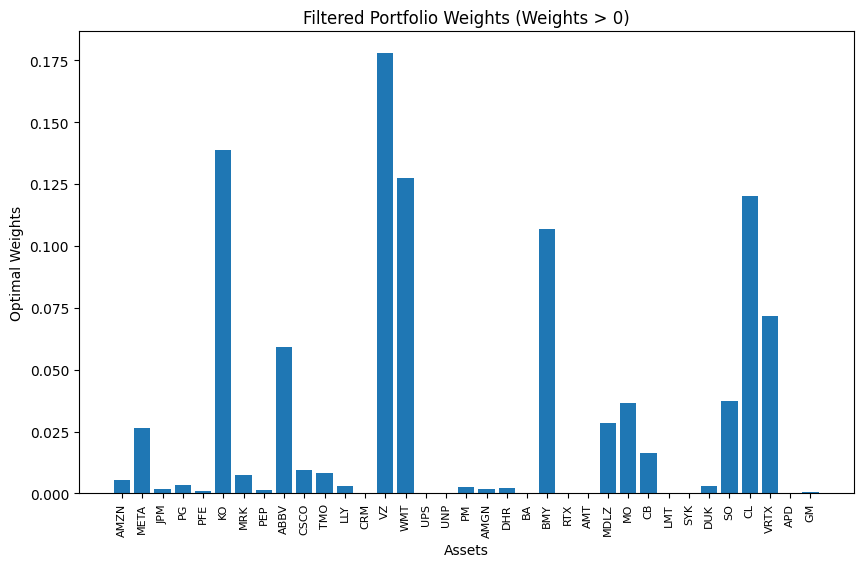

In [16]:
# Graficar solo los stocks cuyos pesos son mayores que 0
filtered_tickers = [tickers[i] for i in range(len(solution)) if solution[i] > 0]
filtered_weights = [solution[i] for i in range(len(solution)) if solution[i] > 0]

plt.figure(figsize=(10, 6))
plt.bar(filtered_tickers, filtered_weights)

plt.xlabel('Assets')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Optimal Weights')
plt.title('Filtered Portfolio Weights (Weights > 0)')

plt.show()

## Multiobjetivo

$\text{max} \sum_{i=n}^{n}w_i \mu_i$

* Donde:
    * $w_i$: Peso asociado al stock i
    * $\mu_i$: Retorno esperado del stock i

$\text{min } {\sigma = W \Sigma W^T}$

* Donde:
    * $\sigma$: Desviación estándar asociada al portafolio
    * $W$: Vector de pesos del portafolio
    * $\Sigma$: Matriz de covarianza

In [40]:
# Dominancia: True si a domina a b
def dominates(a, b):
    return (a[0] > b[0] and a[1] <= b[1]) or (a[0] >= b[0] and a[1] < b[1])

# evaluación Multi-objetivo: Regresa ambos objetivos
def evaluate_multiobjective(individual, log_returns, cov_matrix):
    return expected_return(individual, log_returns), standard_deviation(individual, cov_matrix)

# Aproximación al frente de Pareto: soluciones no dominadas
def non_dominated_sorting(population_evaluations):
    pareto_front = []
    for i, eval_i in enumerate(population_evaluations):
        dominated = False
        for j, eval_j in enumerate(population_evaluations):
            if i != j and dominates(eval_j, eval_i):
                dominated = True
                break
        if not dominated:
            pareto_front.append(i)
    return pareto_front

# Algoritmo genético multiobjetivo (Maximizar retorno, minimizar riesgo)
def geneticAlgorithm_multiobjective(nbAssets, populationSize, cRate, mRate, generations, log_returns, cov_matrix):
    population = [createIndividual(nbAssets) for _ in range(populationSize)]
    evaluations = [evaluate_multiobjective(ind, log_returns, cov_matrix) for ind in population]
    
    # Finding the initial Pareto front
    pareto_indices = non_dominated_sorting(evaluations)
    pareto_population = [population[i] for i in pareto_indices]
    pareto_evaluations = [evaluations[i] for i in pareto_indices]

    for gen in range(generations):
        new_population = []
        for _ in range(populationSize // 2):
            parentA = select(population, [ev[0] - ev[1] for ev in evaluations], 3)
            parentB = select(population, [ev[0] - ev[1] for ev in evaluations], 3)
            offspringA, offspringB = combine(parentA, parentB, cRate)
            new_population.extend([offspringA, offspringB])
        
        population = [mutate(ind, mRate) for ind in new_population]
        evaluations = [evaluate_multiobjective(ind, log_returns, cov_matrix) for ind in population]

        # Actualizar frente de Pareto
        all_population = pareto_population + population
        all_evaluations = pareto_evaluations + evaluations
        pareto_indices = non_dominated_sorting(all_evaluations)
        pareto_population = [all_population[i] for i in pareto_indices]
        pareto_evaluations = [all_evaluations[i] for i in pareto_indices]

    return pareto_population, pareto_evaluations

pareto_solutions, pareto_values = geneticAlgorithm_multiobjective(96, 30, 0.80, 0.05, 200, log_returns, cov_matrix)

sr = []
# Sharpe ratio medio
for sol, val in zip(pareto_solutions, pareto_values):
    sr.append((val[0] - 0.02) / val[1])
    # print(f"Return: {val[0]:.4f}, Risk: {val[1]:.4f}, ")

print(f'Mean Sharpe Ratio: {np.mean(sr)}')

Mean Sharpe Ratio: 1.2422588091395577


### Análisis de Resultados

In [18]:
# Listar los retornos y riesgos para plottear frente de Pareto
returns = []
risks = []
for sol, val in zip(pareto_solutions, pareto_values):
    returns.append(val[0])
    risks.append(val[1])
    print(f'Sharpe Ratio: {(val[0] - 0.02) / val[1]}')

Sharpe Ratio: 1.1750371451392176
Sharpe Ratio: 0.9884139615866224
Sharpe Ratio: 1.2592962898097944
Sharpe Ratio: 1.0588946034749787
Sharpe Ratio: 1.2174312609460403
Sharpe Ratio: 1.3185063442535387
Sharpe Ratio: 1.2618949642298718
Sharpe Ratio: 1.3533692243314077
Sharpe Ratio: 1.3517358139029283
Sharpe Ratio: 1.3517358139029283
Sharpe Ratio: 1.2867440162123167
Sharpe Ratio: 1.4191380900259853
Sharpe Ratio: 1.395000313156431
Sharpe Ratio: 1.3903799682004987
Sharpe Ratio: 1.3270656235240221
Sharpe Ratio: 1.2005619069982403
Sharpe Ratio: 1.1914523099927854
Sharpe Ratio: 1.3167930855812728
Sharpe Ratio: 1.3136050748586026
Sharpe Ratio: 1.294498297855934
Sharpe Ratio: 1.3566282236449392
Sharpe Ratio: 1.354683198870953
Sharpe Ratio: 1.4168644532347088
Sharpe Ratio: 1.375810379757782
Sharpe Ratio: 1.398278948530769
Sharpe Ratio: 1.336932623322267
Sharpe Ratio: 1.3308885040195004


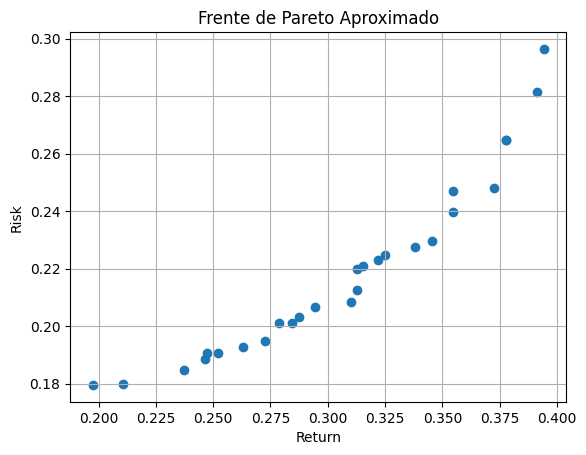

In [19]:
# Plottear frente de Pareto
plt.scatter(returns, risks)
plt.grid()
plt.xlabel('Return')
plt.ylabel('Risk')
plt.title('Frente de Pareto Aproximado')
plt.show();

### Ordenar soluciones de menos riesgo a más riesgo

In [20]:
def sort_pareto_values_and_solutions(pareto_values, solutions):
    # Zip pareto_values y solutions para mantener el vínculo
    combined = list(zip(pareto_values, solutions))
    
    # Ordenar en base al segundo elemento de pareto_values
    sorted_combined = sorted(combined, key=lambda x: x[0][1])
    
    # Separar los valores ordenados y las soluciones
    sorted_values = [x[0] for x in sorted_combined]
    sorted_solutions = [x[1] for x in sorted_combined]
    
    return sorted_values, sorted_solutions

### Solución con menos varianza

In [21]:
values, solutions = sort_pareto_values_and_solutions(pareto_values, pareto_solutions)

### Solución con más profit

(np.float64(0.3941124082439106), np.float64(0.2964687385627452))
1.2618949642298718


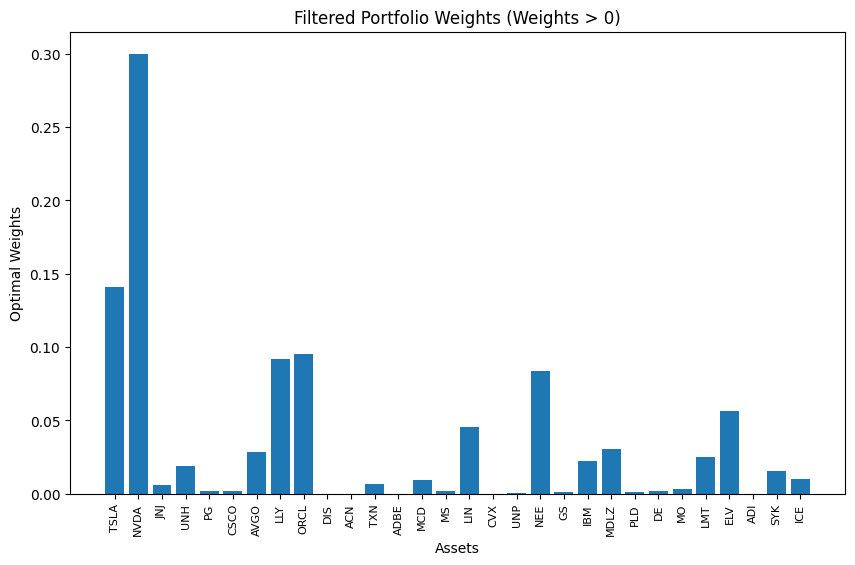

In [22]:
value =values[-1]
print(value)
print((value[0] - 0.02) / value[1])
solution = solutions[-1]
# Graficar solo los stocks cuyos pesos son mayores que 0
filtered_tickers = [tickers[i] for i in range(len(solution)) if solution[i] > 0]
filtered_weights = [solution[i] for i in range(len(solution)) if solution[i] > 0]

plt.figure(figsize=(10, 6))
plt.bar(filtered_tickers, filtered_weights)

plt.xlabel('Assets')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Optimal Weights')
plt.title('Filtered Portfolio Weights (Weights > 0)')

plt.show()

### Solución con menos varianza

(np.float64(0.1974663138209788), np.float64(0.17954654701164502))
0.9884139615866224


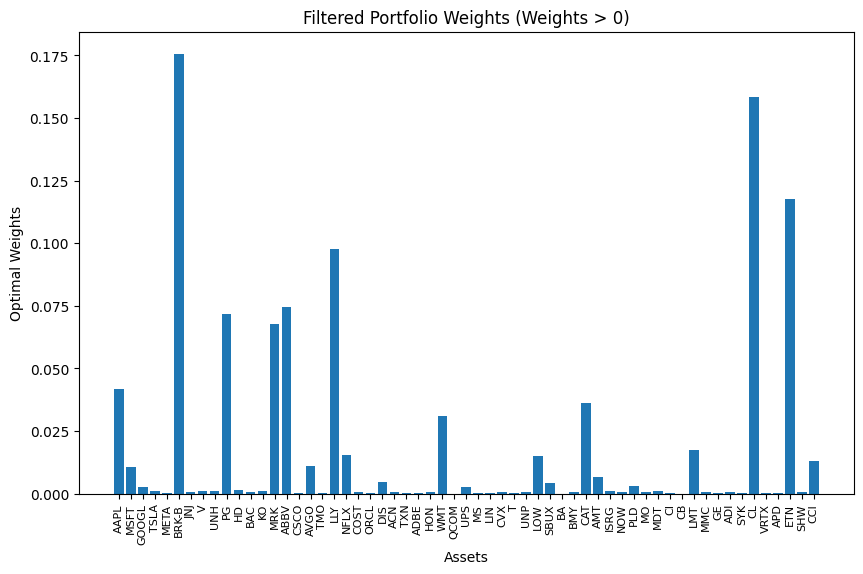

In [23]:
value =values[0]
print(value)
print((value[0] - 0.02) / value[1])
solution = solutions[0]
# Graficar solo los stocks cuyos pesos son mayores que 0
filtered_tickers = [tickers[i] for i in range(len(solution)) if solution[i] > 0]
filtered_weights = [solution[i] for i in range(len(solution)) if solution[i] > 0]

plt.figure(figsize=(10, 6))
plt.bar(filtered_tickers, filtered_weights)

plt.xlabel('Assets')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Optimal Weights')
plt.title('Filtered Portfolio Weights (Weights > 0)')

plt.show()